# Проект "Выбор гипотезы и анализ результатов А/В-теста"

## Часть 1
### Введение
Имеется подготовленный список гипотез для увеличения выручки интернет-магазина.
Необходимо приоритизировать гипотезы для запуска A/B-теста и анализа результатов.

Задачи:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Импортируем необходимую для этого библиотеку.

In [1]:
import pandas as pd

### Получение данных
Прочитаем датасет с гипотезами по увеличению выручки и посмотрим общую информацию.

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 9 entries, 0 to 8

Data columns (total 5 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   Hypothesis  9 non-null      object

 1   Reach       9 non-null      int64 

 2   Impact      9 non-null      int64 

 3   Confidence  9 non-null      int64 

 4   Efforts     9 non-null      int64 

dtypes: int64(4), object(1)

memory usage: 488.0+ bytes


Всего 9 строк и 5 столбцов - можно вывести таблицу целиком и посмотреть на данные.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Сразу для удобства приведем названия столбцов к нижнему регистру.

In [3]:
data.columns = map(str.lower, data.columns)
display(data)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Благодаря небольшому размеру таблицы, видим, что отсутствуют дубликаты, аномалии и пропуски, а типы данных соответствуют необходимым для расчета. Можно рассчитывать ICE.

### Расчет приоритизации гипотез
Расчитаем ICE для имеющихся гипотез.

In [4]:
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Наиболее перспективные гипотезы 8, 0 и 7. Расчитаем RICE.

In [5]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE

7  Добавить форму подписки на все основные страни...  112.0

2  Добавить блоки рекомендаций товаров на сайт ин...   56.0

0  Добавить два новых канала привлечения трафика,...   40.0

6  Показать на главной странице баннеры с актуаль...   40.0

8  Запустить акцию, дающую скидку на товар в день...   16.2

3  Изменить структура категорий, что увеличит кон...    9.0

1  Запустить собственную службу доставки, что сок...    4.0

5  Добавить страницу отзывов клиентов о магазине,...    4.0

4  Изменить цвет фона главной страницы, чтобы уве...    3.0


По RICE самая перспективная гипотеза с большим отрывом - 7. Далее 2, 0 и 6 гипотезы.

Так произошло, потому что фреймворк RICE учитывает reach — скольких пользователей затронет изменение, благодаря чему 7-я гипотеза, у которой reach = 10, уверенно вырвалась вперед, а 8-я гипотеза, у которой reach = 1, опустилась ниже по списку.

Выведем описание самой перспективной гипотезы по RICE.

In [6]:
top_hypothesis = data.sort_values(by='RICE', ascending=False).head(1)
pd.options.display.max_colwidth = 130
display(top_hypothesis['hypothesis'])

7    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Name: hypothesis, dtype: object

## Часть 2.
### Введение
A/B-тест был проведен и были получены результаты, которые необходимо проанализировать.

Задачи:
1. Прочитать результаты теста и провести предобработку данных в случае необходимости.
2. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
3. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
4. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
5. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
6. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
7. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
8. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
9. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
10. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
11. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
14. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
15. Принять решение по результатам теста и объяснить его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

Импортируем необходимые для этого библиотеки и модули.

In [7]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Получение результатов теста
Прочитаем в переменную orders данные о заказах, а в перерменную visitors - данные о пользователях.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1197 entries, 0 to 1196

Data columns (total 5 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   transactionId  1197 non-null   int64 

 1   visitorId      1197 non-null   int64 

 2   date           1197 non-null   object

 3   revenue        1197 non-null   int64 

 4   group          1197 non-null   object

dtypes: int64(3), object(2)

memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 62 entries, 0 to 61

Data columns (total 3 columns):

 #   Column    Non-Null Count  Dtype 

---  ------    --------------  ----- 

 0   date      62 non-null     object

 1   group     62 non-null     object

 2   visitors  62 non-null     int64 

dtypes: int64(1), object(2)

memory usage: 1.6+ KB


Наблюдаем, что в таблицах нет ни единого пропуска.

Столбцы таблицы orders:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Столбцы таблицы visitors:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Типы данных столбцов соответсвуют необходимым кроме столбцов с датами. Посомтрим в каком виде записаны даты и приведем их к нужному типу данных.


In [9]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1197 entries, 0 to 1196

Data columns (total 5 columns):

 #   Column         Non-Null Count  Dtype         

---  ------         --------------  -----         

 0   transactionId  1197 non-null   int64         

 1   visitorId      1197 non-null   int64         

 2   date           1197 non-null   datetime64[ns]

 3   revenue        1197 non-null   int64         

 4   group          1197 non-null   object        

dtypes: datetime64[ns](1), int64(3), object(1)

memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 62 entries, 0 to 61

Data columns (total 3 columns):

 #   Column    Non-Null Count  Dtype         

---  ------    --------------  -----         

 0   date      62 non-null     datetime64[ns]

 1   group     62 non-null     object        

 2   visitors  62 non-null     int64         

dtypes: datetime64[ns](1), int64(1), object(1)

memory usage: 1.6+ KB


Теперь типы данных позволяют провести расчет. Проверим данные на явные дубликаты.

In [11]:
print('Дубликаты таблицы orders:', orders.duplicated().sum())
print('Дубликаты таблицы visitors:', visitors.duplicated().sum())

Дубликаты таблицы orders: 0

Дубликаты таблицы visitors: 0


Явные дубликаты не найдены, а неявных, будем считать, нет, так как данные в основном в числовом формате, где неявным дубликатам появиться затруднительно.

Можно приступать к анализу.

### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Соберем их в датафрейм cumulativeData со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# создаем кумулятивные данные по дням по таблице orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transactionId' : 'nunique', 
         'visitorId' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

# создаем кумулятивные данные по дням по таблице visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

# присваиваем столбцам понятные названия
cumulativeData.columns = ['date', 
                          'group', 
                          'orders', 
                          'buyers', 
                          'revenue', 
                          'visitors']
display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график кумулятивной выручки для каждой группы.

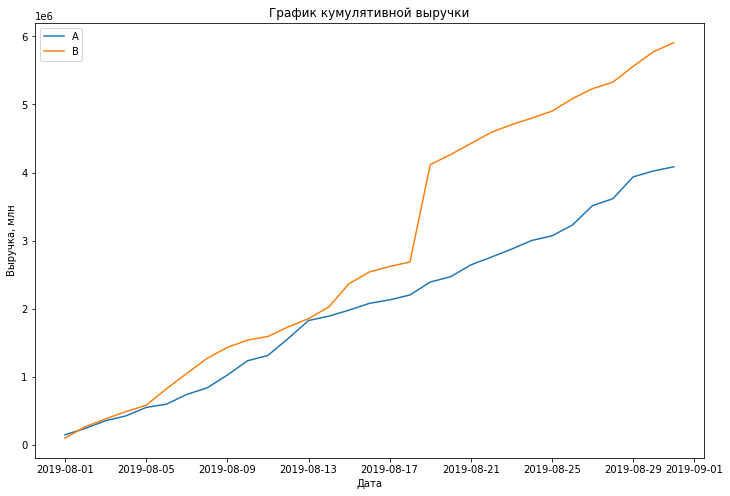

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.show()

Выручка в обех группах растет почти равномерно, но в группе В виден резкий скачек, что может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Несмотря на это, графики выглядят так, что выручка группы В почти всегда больше выручки группы А.

### График кумулятивного среднего чека по группам
Построим график кумулятивного среднего чека, разделив кумулятивную выручку на кумулятивное число заказов.

Text(0, 0.5, 'Средний чек')

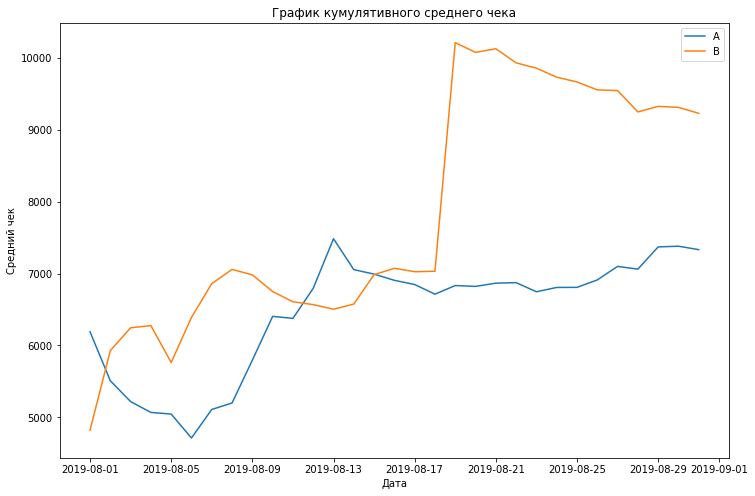

In [14]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='A')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B')
plt.legend()
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

Чем ближе к конце теста, тем более стабильные становятся графики, при этом график А держится в районе 7000, а график В после резкого роста, постепенно снижается. Резкий рост графика В свидетельствует об аномально крупном заказе или заказах. В таком случае графику В нужно больше времени, чтобы прийти к реальному среднему чеку и установиться на его уровне. При этом низкий в начале график А, и последующий резкий рост свидетельствует о дешевых заказах.

### График относительного изменения кумулятивного среднего чека группы B к группе A
Построим график относительного различия для среднего чека.

Text(0, 0.5, 'Относительное изменение')

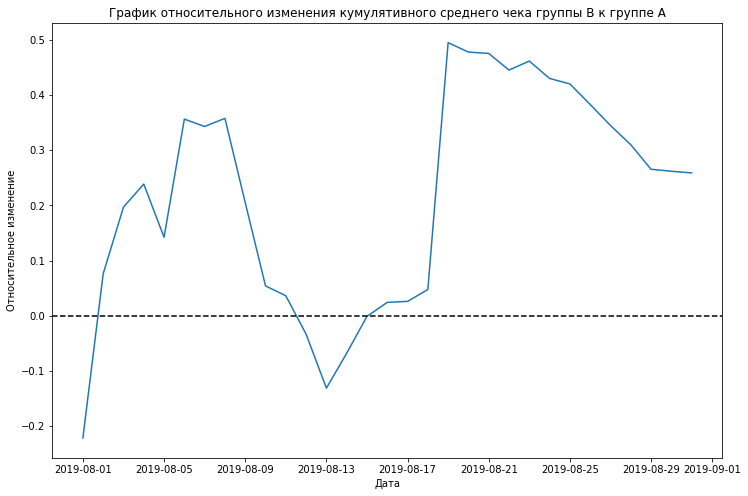

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,8))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')

Практически везде график положительный, то есть вроде бы как кумулятивный средний чек группы В имеет преимущество перед группой А, но большие резкие перепады свидетельствуют о всплесках в данных.

### График кумулятивного среднего количества заказов на посетителя по группам
Иными словами, построим график кумулятивной конверсии.

Text(0, 0.5, 'Кумулятивная конверсия')

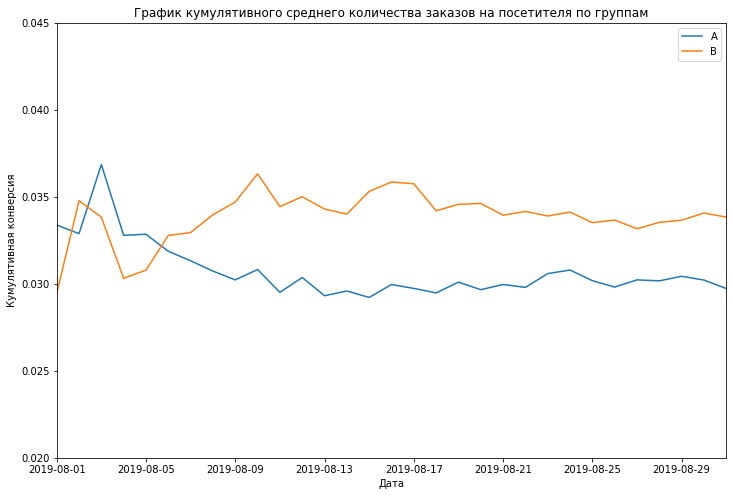

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([cumulativeDataA['date'].min(), cumulativeDataA['date'].max(), 0.020, 0.045])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

Вначале графики существенно колебались и даже пересекались, но потом разошлись и стабилизировались. Судя по графикам, кумулятивная конверсия группы В имеет преимущество практически на всем временном диапазоне проведения теста.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
Иными словами, построим график относительного изменения кумулятивной конверсии группы В к группе А.

Text(0, 0.5, 'Относительное изменение')

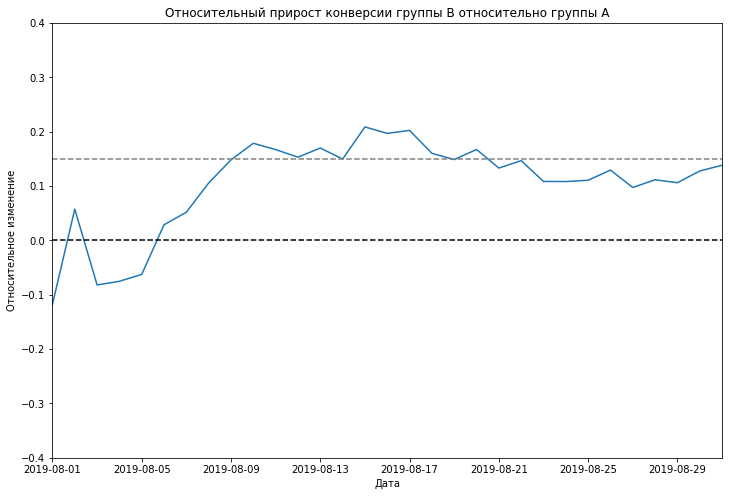

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([cumulativeDataA['date'].min(), cumulativeDataA['date'].max(), -0.4, 0.4])

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')

С самого начала группы В как вырвалась вперед, так и продолжила держаться на протяжении всего времени теста.

### Точечный график количества заказов по пользователям
Посчитаем количество заказов по пользователям в переменную ordersByUsers и построим график.

Text(0, 0.5, 'Количество заказов')

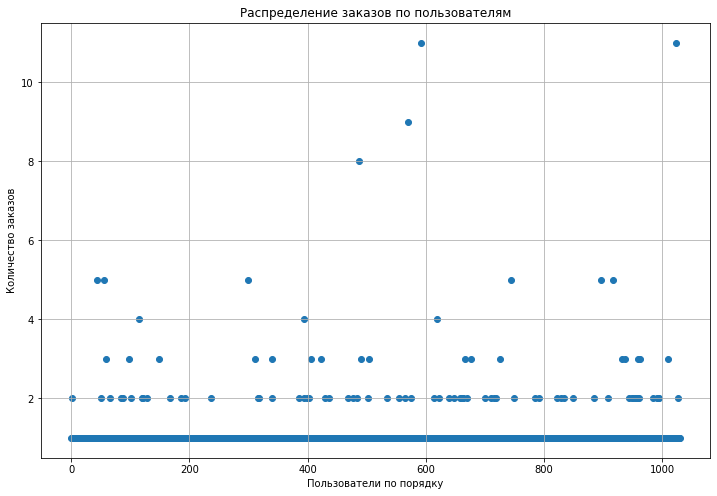

In [18]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,8))
plt.scatter(x_values, ordersByUsers['orders'])

plt.grid(True)
plt.title('Распределение заказов по пользователям')
plt.xlabel('Пользователи по порядку')
plt.ylabel('Количество заказов')

Видим, что подавляющее большинство пользователей сделало всего 1 покупку, гораздо меньше пользователей сделало 2 покупки и еще меньше - 3 покупки, и так далее. Однако есть пользователи, которые сделали и 11 заказов. Определим границы, за которыми значения будут считаться аномальными.

### Выбор границ для определения количества аномальных пользователей
Определим 90, 95 и 99 перцентили количества заказов по пользователям.

In [19]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Грубо говоря, 90% пользователей сделали по 1 заказу, не более 5% пользователей сделали больше 2 заказов, а более 4 заказов сделали всего 1% пользователей. Логично выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов
Посчитаем стоимость заказов и построим точечный график.

Text(0, 0.5, 'Стоимость заказа, млн')

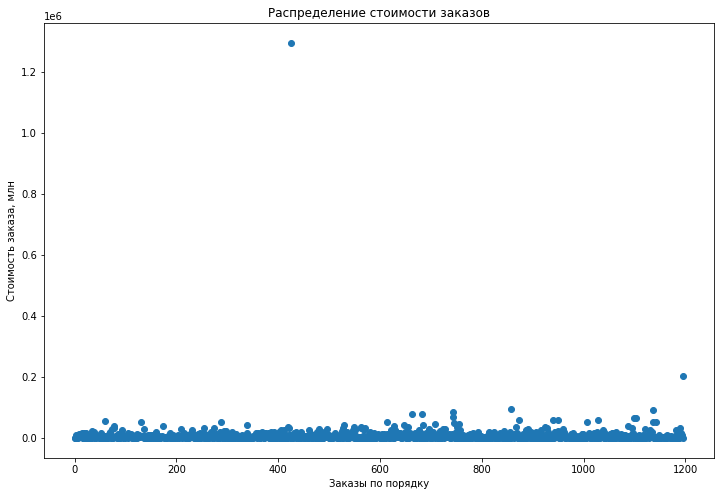

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12,8))
plt.scatter(x_values, orders['revenue'])

plt.title('Распределение стоимости заказов')
plt.xlabel('Заказы по порядку')
plt.ylabel('Стоимость заказа, млн')

Визуально, стоимость заказа редко превышает 50 000, но видно один заказ примерно на 1.3 млн, что является явным выбросом, мешающим анализу теста. Аналогично, определим границы аномальных значений.

### Выбор границ для определения аномальных заказов
Определим 90, 95 и 99 перцентили стоимости заказов в выборке.

In [21]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Выберем 28 000 за верхнюю границу стоимости заказов, чтобы отсеять аномальные заказы по ней.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Подготовим данные и объеденим их в переменную data.

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \

0 2019-08-01              24           148579              21   

1 2019-08-02              20            93822              24   

2 2019-08-03              24           112473              16   

3 2019-08-04              16            70825              17   

4 2019-08-05              25           124218              23   



   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \

0           101217                  24               148579   

1           165531                  44               242401   

2           114248                  68               354874   

3           108571                  84               425699   

4            92428                 109               549917   



   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \

0                  21               101217               719   

1                  45               266748               619   

2                  61

Столбцы в таблице data:	
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами userId и orders. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

В переменные sampleA и sampleB запишем количество заказов по пользователям из разных групп. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [24]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                  .sum() - len(ordersByUsersA['orders'])), 
               name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                  .sum() - len(ordersByUsersB['orders'])), 
               name='orders')],axis=0)

Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой. Также, выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1, округлив до трёх знаков после запятой.

In [25]:
print('p-value:', 
      "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов:', 
      "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017

Относительный прирост среднего числа заказов: 0.138


Вывод: По «сырым» данным в среднем числе заказов групп A и B статистически значима. 

Первое число — p-value = 0.017, что меньше, чем 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. При этом относительный выигрыш группы B равен 13.8%.

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 
Чтобы рассчитать статистическую значимость различий в среднем чеке также воспользуемся критерием Манна-Уитни, передав данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами.

In [26]:
print('p-value:', 
      '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека:', 
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729

Относительный прирост среднего чека: 0.259


P-value значительно больше, чем 0.05, соответственно нет причин отвергать нулевую теорию, то есть средние чеки между группами стастически равны. Вдобавок, средний чек группы B на 25,9% больше среднего чека группы A.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
Сформулируем аналогичные гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Выделим аномальных пользователей. В прошлых пунктах определили, что такими пользователями будут те, кто совершил более 2 заказов или сделал заказ дороже 28 000.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:',abnormalUsers.shape[0])
print('Доля аномальных пользователей от общего числа:', 
      '{0:.3f}'.format(abnormalUsers.shape[0]/orders['visitorId'].nunique()))

1099    148427295

18      199603092

928     204675465

23      237748145

37      249864742

dtype: int64

Количество аномальных пользователей: 74

Доля аномальных пользователей от общего числа: 0.072


Всего нашлось 74 аномальных пользователя, что составляет 7.2% от общего числа пользователей, участвовавших в тесте.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста и запишем их в переменные sampleAFiltered и sampleBFiltered.

In [28]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0,
               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')], 
    axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0,
               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],
    axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [29]:
print('p-value:', 
      '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительный прирост среднего числа заказов:', 
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013

Относительный прирост среднего числа заказов: 0.173


Вывод: По «очищенным» данным в среднем числе заказов групп A и B есть статистически значимое различие. 

Первое число - p-value = 0.013, что всё ещё меньше, чем 0.05, и меньше, чем p-value по "сырым" данным, которое равно 0.017. То есть, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

При этом относительный выигрыш группы B теперь равен 17.3%, а по "сырым" данным -  13.8%, то есть без аномальных значений выигрышь группы В еще больше.

###  Статистическая значимость различий в среднем чеке заказа между группами по «чистым» данным
Аналогично, нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Снова применим статистический критерий Манна-Уитни к полученным ранее выборкам.

In [30]:
print('p-value:',
      '{0:.3f}'.format(
          stats.mannwhitneyu(
              orders[
                  np.logical_and(
                      orders['group'] == 'A',
                      np.logical_not(orders['visitorId'].isin(abnormalUsers))
                  )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers))
                )
            ]['revenue'],
          )[1]
      )
     )


print('Относительный прирост среднего чека:',
      "{0:.3f}".format(
          orders[
              np.logical_and(
                  orders['group'] == 'B',
                  np.logical_not(orders['visitorId'].isin(abnormalUsers))
              )
          ]['revenue'].mean()
          / orders[
              np.logical_and(
                  orders['group'] == 'A',
                  np.logical_not(orders['visitorId'].isin(abnormalUsers))
              )
          ]['revenue'].mean() - 1
      )
     )

p-value: 0.738

Относительный прирост среднего чека: -0.020


По "очищенным" данным p-value чуть увеличилось до 0.738 по сравнению с "сырыми" данными, где p-value было равно 0.729. Это значит, что нулевую гипотезу не отвергаем, то есть средние чеки между группами статистически равны.

А вот прирост среднего чека по "очищенным" данным оказался отрицательным, то есть в группе В средний чек уменьшился на 2%, в то время как по "сырым" данным был прирост 25,9%.

Это различие в средних чеках скорее всего возникло как раз из-за аномальных заказов, в частности из-за заказа в 1.3 млн, который судя по графику кумулятивного среднего чека был в группе В.

### Решение по результатам теста

Выполнив анализ результатов теста можно сделать следующие выводы:
- И по "сырым", и по "очищенным" данным имеется статистическая значимая разница в среднем числе заказов групп. В обоих случаях имеется прирост среднего числа заказов в группе В.
- И по "сырым", и по "очищенным" данным средние чеки между группами статистически равны. Хотя по "сырым" данным имелся прирост среднего чека в группе В на 25.9%, то по "очищенным" данным средний чек группы В уменьшился на 2%.

## Общий вывод
1. Были приоритезированы гипотезы для проведения А/В-теста и определена самая перспективная.
2. Проведен анализ результатов А/В-теста, в результате чего сделаны выводы:
    - В группе В имеется статистически значимый прирос среднего числа заказов.
    - По среднему чеку между группами статистически значимой разницы нет.
    - Результат теста можно считать положительным, группа В выигрывает по среднему числу заказа, не проиграв по среднему чеку.
    - Тест можно считать завершенным, дальнейшее продолжение смысла не имеет.